# 1.4 Polinomios de Taylor y diferenciación numérica

Este libro es para la parte de código de la [sección 1.6 de las notas](https://itam-ds.github.io/analisis-numerico-computo-cientifico/1.computo_cientifico/1.6/Polinomios_de_Taylor_y_diferenciacion_numerica.html)

## Teorema de Taylor
**Ejemplo**:
<br>Graficar la función y los polinomios de Taylor de grados $[0,1,2,3,4]$ y en una sola gráfica para el intervalo $[1,2]$ de la función $\frac{1}{x}$ con centro en $x_{0}=1.5$. ¿Cuánto es la aproximación de los polinomios en $x=1.9$? Calcula el error relativo de tus aproximaciones.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def aprox_taylor(x, c, n):
    """
    Taylor approximation for 1/x function. Will return Taylor polynomial of degree n with
    center in c and evaluated in x.
    Args:
        x: numeric vector or scalar in which Taylor polynomial will be evaluated. 
        c: scalar which represents center of Taylor polynomial of degree n.
        n: scalar which represents degree of Taylor polynomial. 
    --------------------
    Returns:
        sum_taylor: scalar evaluation of Taylor polynomial of degree n with center c in x.
    """
    sum_taylor = np.zeros((len(x)))
    
    for i in range(len(x)):
        #Se define el polinomio g0, constante para todas las iteraciones
        mult = c**(-1)
        sum_taylor[i] = mult
        #Se van agregando polinomios g>0 a la serie
        for j in range(n):
            mult = (-1) * c**(-1) * (x[i]-c) * mult
            sum_taylor[i] = sum_taylor[i] + mult
    
    return sum_taylor

### Graficando Taylor

In [3]:
#Se define la función que se desea aproximar con taylor
func = lambda x: 1/x

#Se definen parámetros para aproximación de taylor
x0 = 1.5
x = np.arange(1, 2, 0.005)
n = np.arange(0,5)
y = func(x)

#Se aproxima 'y' con taylor para diferentes n
y_taylor_0 = aprox_taylor(x, x0, n[0])
y_taylor_1 = aprox_taylor(x, x0, n[1])
y_taylor_2 = aprox_taylor(x, x0, n[2])
y_taylor_3 = aprox_taylor(x, x0, n[3])
y_taylor_4 = aprox_taylor(x, x0, n[4])

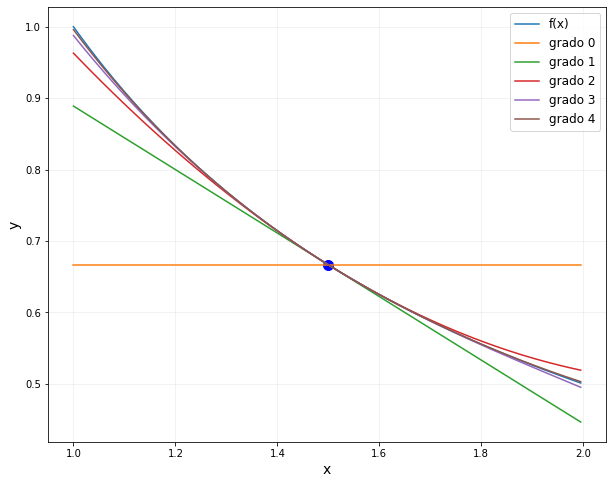

In [4]:
#Gráfica de resultados
plt.figure(figsize=(10, 8))

plt.scatter(x=x0, y=func(x0), s=100, c='b')
plt.plot(x, y, label='f(x)')
plt.plot(x, y_taylor_0, label='grado 0')
plt.plot(x, y_taylor_1, label='grado 1')
plt.plot(x, y_taylor_2, label='grado 2')
plt.plot(x, y_taylor_3, label='grado 3')
plt.plot(x, y_taylor_4, label='grado 4')

#Anotaciones y estilo
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)

plt.show()

### Calculando el error
Para una aproximación de Taylor centrada en $x_{0}=1.5$ y evaluada en $x=1.9$

In [5]:
x_val = [1.9]
y_val = func(x_val[0])

for i in range(len(n)):
    y_hat = aprox_taylor(x=x_val, c=x0, n=n[i])[0]
    rel_err = abs(y_hat - y_val) / abs(y_val)
    
    print(f"Error relativo Taylor {n[i]}°: {rel_err:.6f}")

Error relativo Taylor 0°: 0.266667
Error relativo Taylor 1°: 0.071111
Error relativo Taylor 2°: 0.018963
Error relativo Taylor 3°: 0.005057
Error relativo Taylor 4°: 0.001348


### Ejercicio
Aproximar $f(1)$ con polinomios de Taylor de orden $[0,1,2,3,4]$ si $f(x)=-0.1x^{4}-0.15x^{3}-0.5x^{2}-0.25x+1.2$ con centro en $x0=0$. Calcula los errores relativos de tus aproximaciones. Realiza las gráficas de cada polinomio en el intervalo $[0,1]$. Observa que $R_{5}(x)$ es cero.

## Diferencas Finitas

**Ejemplo**:
<br>Realizar una gráfica de `log(error relativo)` vs `log(h)` (h en el eje horizontal) para aproximar la primera derivada de $f(x)=e^{-x}$ en $x=1$ con $h\in[10^{-16},...,10^{-1}]$ y diferencias hacia adelante.
<br>Valor por aproximar: $f^{(1)}(1)=-e^{-1}$

In [6]:
#Función de interés
def F(x): return np.exp(-x)

#Aprox. derivada x difs. finitas adelante
def approx_first_der(f, x, h):  return ( f(x+h) - f(x) )/h

In [7]:
#Diccionario para almacenar derivadas
dif_adela = {'h': [],
            'd_1': []}

#Vector de h's: [1e-1, 1e-16]
for i in range(1,17):
    dif_adela['h'].append(math.pow(10, -i))
    
dif_adela['h'][:5]

[0.1, 0.01, 0.001, 0.0001, 1e-05]

In [8]:
#Evaluando difs. finitas en torno a x=1
x = 1
for i in dif_adela['h']:
    dif_adela['d_1'].append(approx_first_der(F,x,i))
    
dif_adela['d_1'][:5]

[-0.35008357473362783,
 -0.3660461599919007,
 -0.3676955627487377,
 -0.36786104781250106,
 -0.36787760178125234]

In [9]:
#Valor objetivo
obj = -np.exp(-x)

#Convirtiendo a DataFrame y evaluando error
dif_adela = pd.DataFrame(dif_adela)
dif_adela['rel_err'] = np.abs((dif_adela['d_1'] - obj)) / np.abs(obj)

print("En x=1:\n")
dif_adela

En x=1:



,h,d_1,rel_err
0,1.000000e-01,-0.350084,4.837418e-02
1,1.000000e-02,-0.366046,4.983375e-03
2,1.000000e-03,-0.367696,4.998334e-04
3,1.000000e-04,-0.367861,4.999833e-05
4,1.000000e-05,-0.367878,4.999981e-06
5,1.000000e-06,-0.367879,5.000218e-07
6,1.000000e-07,-0.367879,4.929857e-08
7,1.000000e-08,-0.367879,8.556935e-09
8,1.000000e-09,-0.367880,1.725170e-07
9,1.000000e-10,-0.367880,4.743069e-07


### Graficando el error

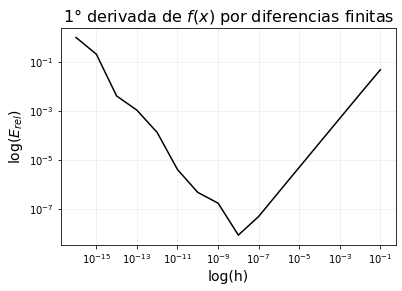

In [10]:
plt.plot(dif_adela['h'], dif_adela['rel_err'], color='black')

#Anotaciones y estilo
plt.title("1° derivada de $f(x)$ por diferencias finitas", fontsize=16)
plt.xlabel('log(h)', fontsize=14)
plt.ylabel('log($E_{rel}$)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.2)

plt.show()

### Diferencias Finitas para $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$

**Ejemplo**:
<br> Aproximar $\nabla f(x)$ con diferencias hacia adelante y $h\in[10^{-16},...,10^{-1}]$ para $f:\mathbb{R}^{4}\rightarrow\mathbb{R}$, dada por $f(x)=(x_{1}^2-x_{2}^2)^2+x_{1}^2+(x_{3}^2-x_{4}^2)+x_{3}^2$ en el punto $x_0=(1.5,1.5,1.5,1.5)^T$. Realizar una gráfica de `log(error relativo)` vs `log(h)`

Primero validamos con `sympy` el gradiente de la función.

In [11]:
import sympy
from sympy.tensor.array import derive_by_array 

In [12]:
x1, x2, x3, x4 = sympy.symbols("x1,x2,x3,x4")
x = (x1, x2, x3, x4)
x

(x1, x2, x3, x4)

In [13]:
f = (x1**2 - x2**2)**2 + x1**2 + (x3**2 - x4**2)**2 + x3**2
f

x1**2 + x3**2 + (x1**2 - x2**2)**2 + (x3**2 - x4**2)**2

In [14]:
derive_by_array(f, x)

[4*x1*(x1**2 - x2**2) + 2*x1, -4*x2*(x1**2 - x2**2), 4*x3*(x3**2 - x4**2) + 2*x3, -4*x4*(x3**2 - x4**2)]